# Introduction:

Metro plays an important role in modern transportation, efficienly moving millions of commuters daily. Ensuring the safety and reliability of these metro system is utmost important. An unexpected anomalies and failure can cause inconvenience to the passengers, moreover it can pose significant economic and safety risk.

The MetroPT3 dataset at our disposal contains columns representing various operational features such as TP2, TP3, H1, DV_Pressure, Reservoirs, Oil_Temperature, Motor_Current, COMP, DV_electric, Towers, MPG, LPS, Pressure, Oil_level, and cadual_impulses. These columns represents several data points that are continuously collected by different sensors and monitoring systems deployed in the metro.


Objective:

The primary objective of this research project is to harness the potential of machine learning algorithms developed to detect the anomalies to identify the deviations from normal patterns within the metro system.
 
Anomalies includes sudden spike or drop in pressure, irregular temperature patterns, unexpected motor current fluctuations etc. Detecting such anomalies is very crucial to ensure reliability and safety of the metro system.

# Columns Present

1) **TP2(bar)** : The pressure on the compressor.

2) **TP3(bar)** : The pressure at pneumatic pannel.

3) **H1(bar)**  : The pressure generated as a result of pressure drop when the cyclonic separator filter    discharges.

4) **DV Pressure(bar)** : The pressure drop caused as the towers discharge air dryers; a zero value indicates that the compressor is working under load.

5) **Reservoirs(bar)** : The downstream reservoir pressure, which should be close to the pneumatic panel pressure (TP3).

6) **Motor Current (A)** : The current of one phase of a three-phase motor is measured; it displays values close to 0A when turned off, 4A while working offloaded, 7A when operating under load, and 9A when it starts functioning.

7) **Oil temperature (celcius)** : Oil temparature on the compressor.

8) **COMP** : the electrical signal of the compressor's air intake valve; it is active when there is no air intake, indicating that the compressor has been turned off or is working in an offloaded mode.

9) **DV electric** : the electrical signal that regulates the compressor outlet valve; it is active when the compressor is loaded and inactive when the compressor is turned off or in an offloaded state.

10) **Towers** : the electrical signal that defines the tower in charge of drying the air and the tower in charge of draining the humidity removed from the air; while not active, it indicates that tower one is in operation; when active, it indicates that tower two is in operation.

11) **MPG** : When the pressure in the air production unit (APU) falls below 8.2 bar, the electrical signal responsible for starting the compressor under load by activating the intake valve; it triggers the COMP sensor, which behaves similarly to the MPG sensor.

12) **LPS** : the electrical signal that detects and activates when the pressure drops below 7 bars.

13) **Pressure Switch** : The electrical signal that detects the discharge in the air-drying towers.

14) **Oil Level** : the electrical signal that monitors the compressor's oil level; it is active when the oil level falls below the expected levels.

15) **Caudal Impulse** : the electrical signal generated by the absolute amount of air going from the APU to the reservoirs.

# EDA

In [16]:
import pandas as pd 
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df0 = pd.read_csv('/Users/apple/Desktop/MetroPT3(AirCompressor) 2.csv')
df0.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

- The given dataset has one unnamed collumn which is not required and can be dropped.

In [17]:
df = df0.drop(columns='Unnamed: 0');
df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

Now , let us check for the NULL values present in the dataset.

In [18]:
df.isnull().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

- Here we can see that there are no **NULL** values in the dataset.

In [19]:
df.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Among the data of analog sensors , 
   - TP2 , TP3 , H1 , DV_pressure , Reservoir and Motor_current varies in the range 0 to 10.
   - Only **Oil temperature** varies in the range **6 to 89** celsius.
   - We can visualize the same using boxplots.

   **Note** : Here we have to do regression analysis , so we will only consider data of analog signals which is continuous in nature.

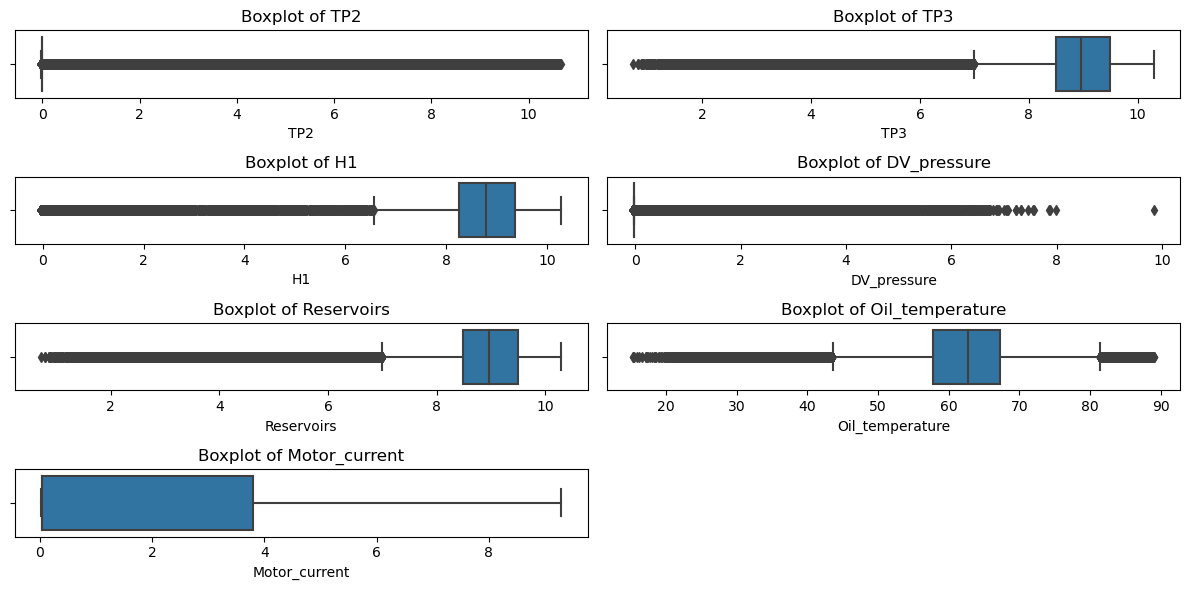

In [20]:

df_box_plot = df[['TP2' , 'TP3' ,'H1' , 'DV_pressure' , 'Reservoirs' , 'Oil_temperature' , 'Motor_current']].copy()

num_cols = len(df_box_plot.columns)
num_rows = (num_cols + 1)//2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6))
axes = axes.flatten()

  
for i, col in enumerate(df_box_plot.columns):
    sns.boxplot(data=df_box_plot, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')


for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


In [21]:
df.dtypes

timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object

- Here we can see that all the readings are in float64 datatype except timestamp.
- timestamp is of **object type** so we should convert it to **datetime** format.

In [22]:
df["timestamp"] = pd.to_datetime(df["timestamp"]);

- Now let us see the timeseries variation of analog sensors.

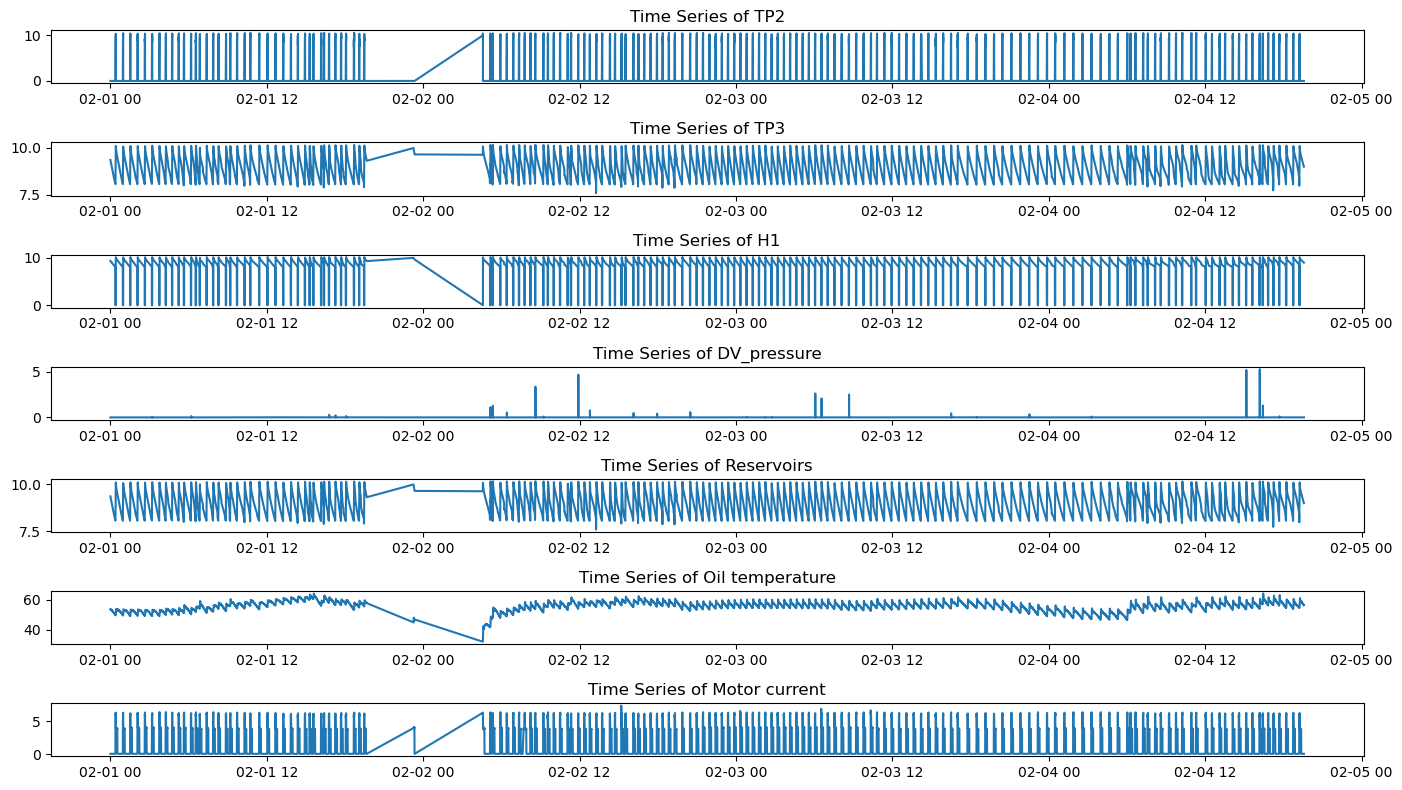

In [23]:
df0=df[0:30000]
plt.figure(figsize=(14, 8))

plt.subplot(7, 1, 1)
plt.plot(df0['timestamp'], df0['TP2'])
plt.title('Time Series of TP2')

plt.subplot(7, 1, 2)
plt.plot(df0['timestamp'], df0['TP3'])
plt.title('Time Series of TP3')

plt.subplot(7, 1, 3)
plt.plot(df0['timestamp'], df0['H1'])
plt.title('Time Series of H1')

plt.subplot(7, 1, 4)
plt.plot(df0['timestamp'], df0['DV_pressure'])
plt.title('Time Series of DV_pressure')

plt.subplot(7, 1, 5)
plt.plot(df0['timestamp'], df0['Reservoirs'])
plt.title('Time Series of Reservoirs')

plt.subplot(7, 1, 6)
plt.plot(df0['timestamp'], df0['Oil_temperature'])
plt.title('Time Series of Oil temperature')

plt.subplot(7, 1, 7)
plt.plot(df0['timestamp'], df0['Motor_current'])
plt.title('Time Series of Motor current')

plt.tight_layout()
plt.show()

- Observations to be written

Now we'll plot pairplots to do bivariate analysis.

<Figure size 1300x1700 with 0 Axes>

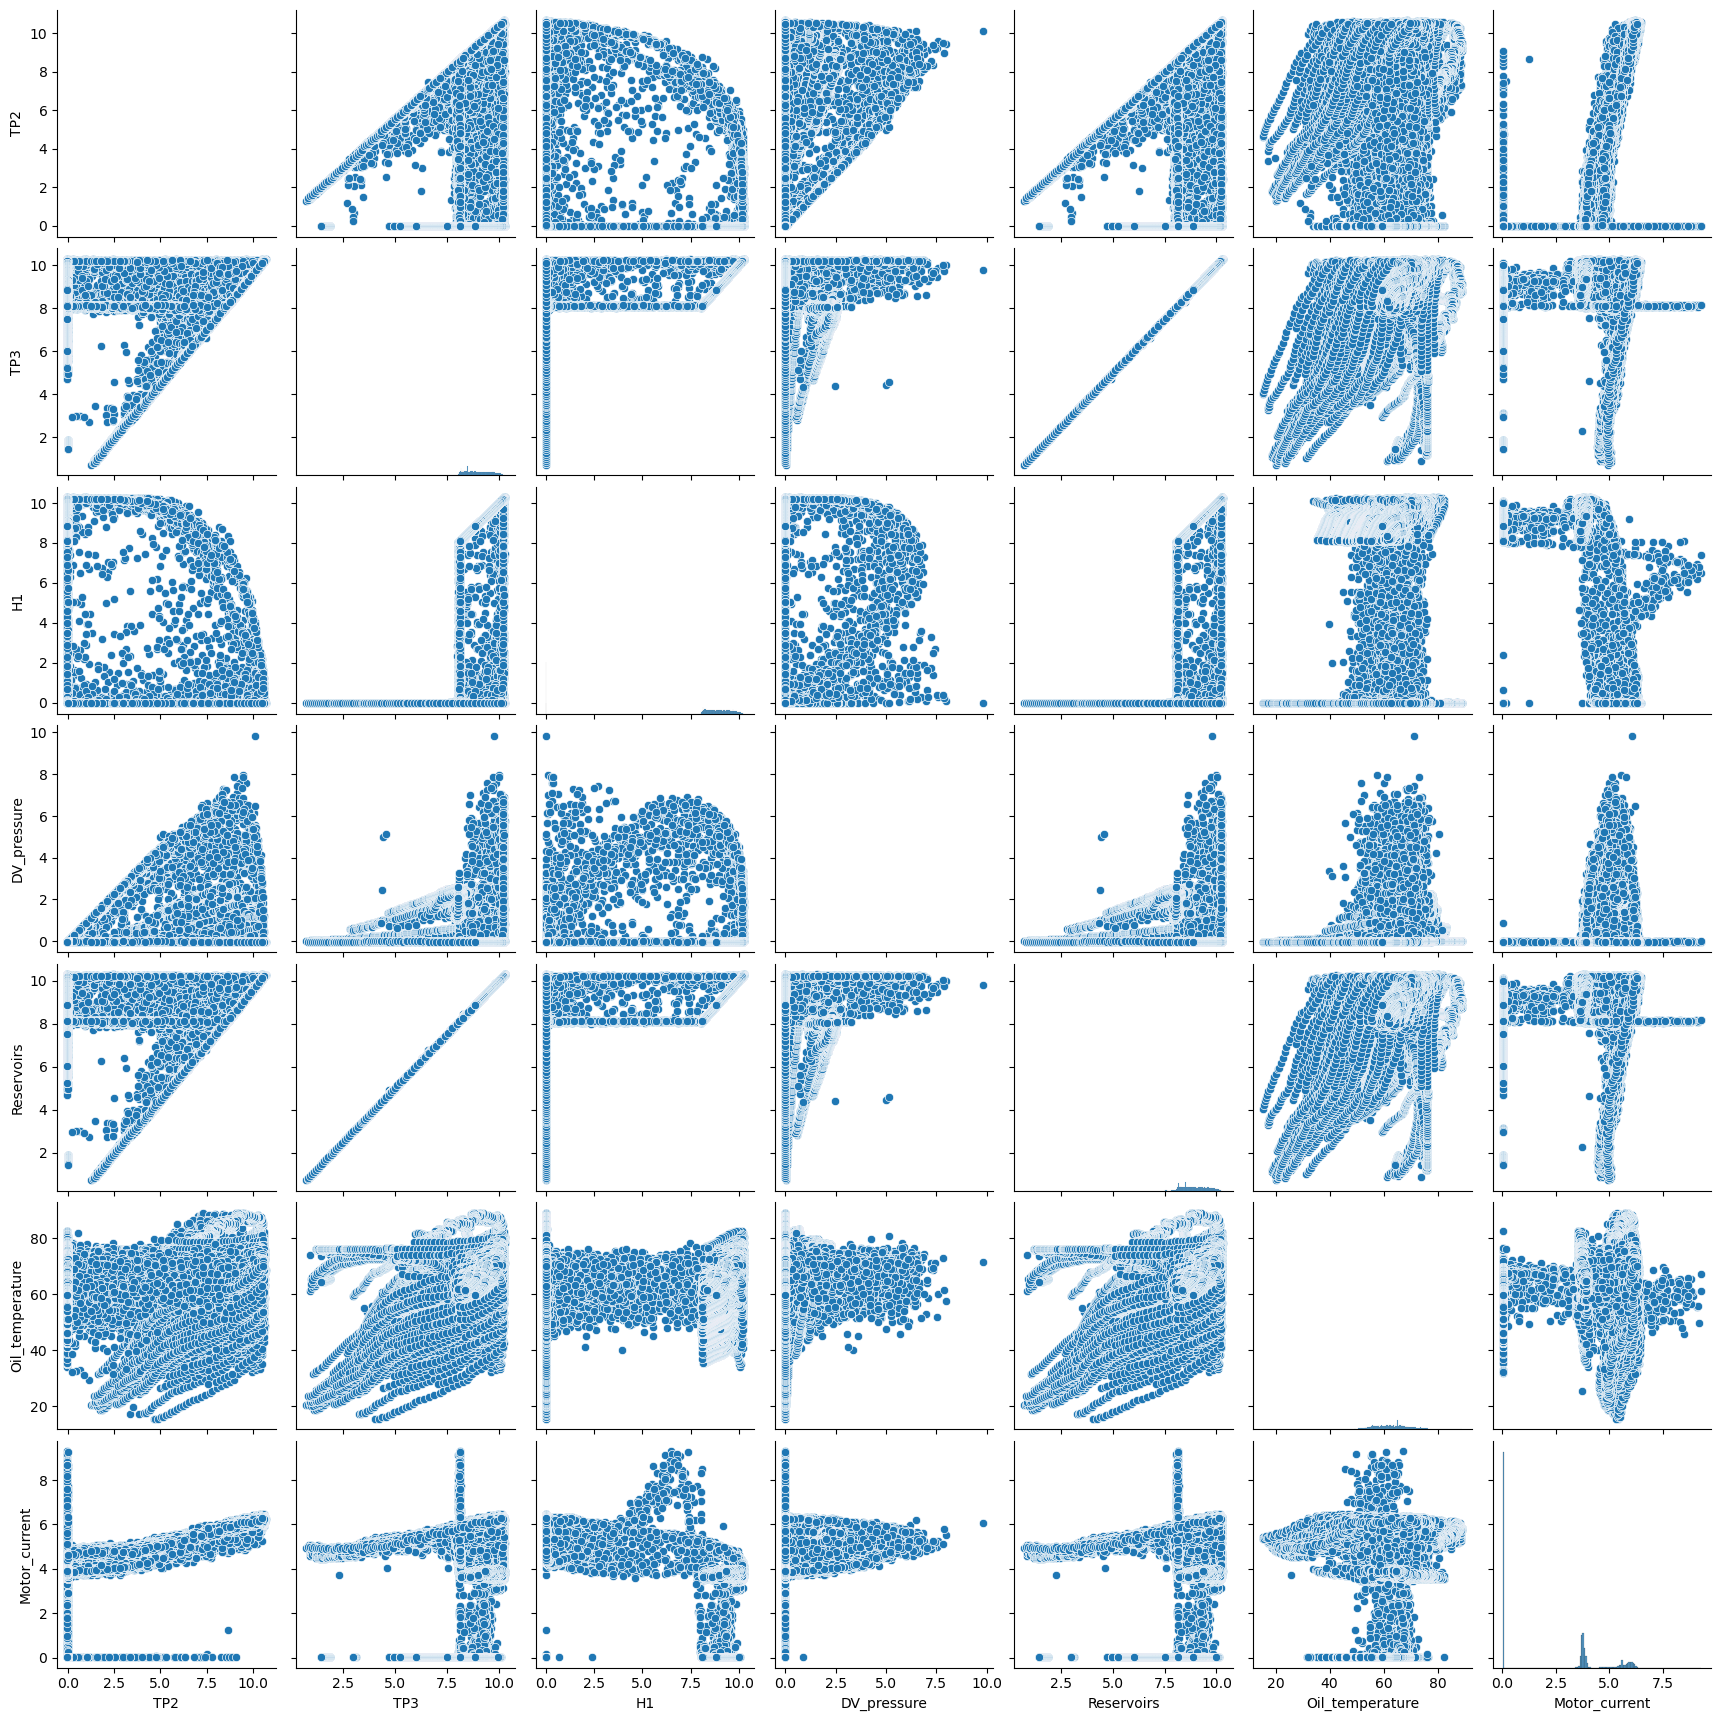

In [24]:
df_pair_plot = df[['TP2' , 'TP3' ,'H1' , 'DV_pressure' , 'Reservoirs' , 'Oil_temperature' , 'Motor_current']].copy()
plt.figure(figsize=(13,17))
sns.pairplot(df_pair_plot )

We can observe the following points from above pairplots,
- Correlation of TP2 and H1 is negative.
- TP2 and DV_pressure are positively correlated with eachother.
- There is a linear relation between Reservoirs and TP3.
- There seems to be a positive correlation between DV_pressure and oil temprature.


We can use heatmap to better visualize the correlation among sensor data.

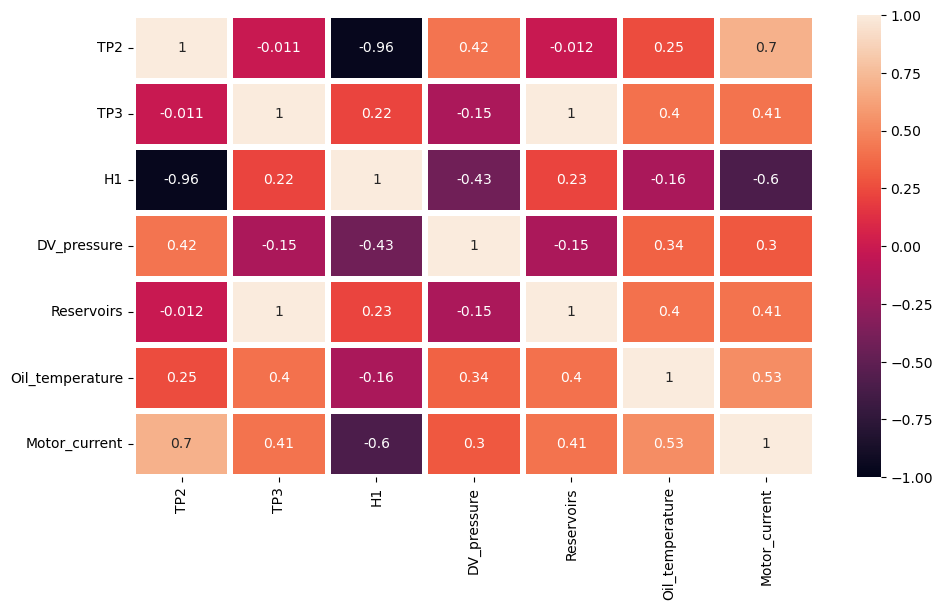

In [25]:
plt.figure(figsize=(11, 6))
sns.heatmap(df_pair_plot.corr(),lw = 3 ,annot = True, vmin = -1, vmax = 1)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.preprocessing import RobustScaler
# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [27]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}
}

In [28]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['r_score'] = None
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)
        r_squarred = r2_score(y_test, y_predicted)
        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['r_score','Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [r_squarred,train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_reg_model_ours)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

# Problem 1 :
**How can we determine or predict the value of TP2 (pressure on compressor) with the help of different readings of digital sensors ?**

From above heatmap, we can infer that TP2 is majorly influenced by DV_Pressure, H1, and motor current as correlation between TP2 and DV_Pressure, H1, and motor current is more than 0.4 or less than -0.4.

Interpretation of the relationship between TP2 and DV_Pressure, H1, and motor current :
1. H1 (Valve activated when pressure is above 10.2 bar) and TP2 (Pressure on compressor):
    A negative correlation between TP2 and H1 suggests that when H1 is activated (which indicated that higher pressure is reached), TP2 tends to decrease.
2. DV_Pressure (Pressure drop due to air dryers towers) and TP2:
    A positive correlation between TP2 and DV_pressure implies that as TP2 increase (higher pressure generated at compressor), DV_pressure tends to increase.This relationship suggests that when the compressor generates more pressure (TP2), it may result in a higher pressure drop in the air dryers towers, leading to increased DV_Pressure.
3. Motor Current and TP2:
    A positive correlation between motor current and TP2 suggests that when compressor operates under higher load (indicated by higher current), it tends to generate higher pressure at compressor

To derive TP2 from H1, DV_Pressure, and motor current, we will use machine learning techniques such as regression analysis or predictive modeling.

In [31]:
# The below python code for splitting the data , training the data and the code for hyperparameter tuning using grid search are referred from Lab2 House Rent Prediction.

data_df = df[["H1" , "DV_pressure" , "Motor_current"]]
X_train, X_test, y_train, y_test = train_test_split(data_df, df["TP2"], random_state=42, test_size=0.20)

size_scaler = RobustScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 3), (303390, 3))

LinearRegression 0.7487175590124177 {}
RandomForestRegressor 0.13039193080336753 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 0.16139810056067902 {'learning_rate': 0.1, 'n_estimators': 210}
Best model:  RandomForestRegressor(max_depth=9, n_estimators=45, random_state=42)


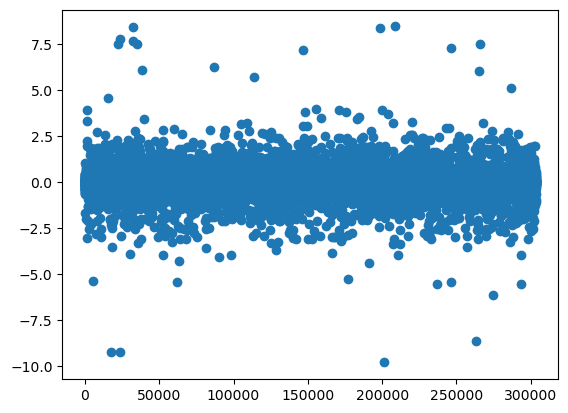

In [32]:
model_results = eval_models()

In [43]:
model_results

,r_score,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.727179,1.206537,1.20232,0.980341,0.978341,{}
RandomForestRegressor,0.906464,0.697141,0.703995,0.281091,0.284648,"{'max_depth': 9, 'n_estimators': 45}"
XGBRegressor,0.907543,0.682491,0.699925,0.273731,0.281378,"{'learning_rate': 0.1, 'n_estimators': 710}"


# Problem 2 :
**How can we determine or predict the value of Oil_temperature (oil temperature on compressor) with the help of different readings of digital sensors ?**

From above heatmap, we can infer that Oil_temperature is majorly influenced by TP3, Reservoirs and motor current as correlation between Oil_temperature and TP3, Reservoirs and motor current is more than 0.4 or less than -0.4.

Interpretation of the relationship between Oil_temperature and TP3, Reservoirs, and motor current :
1. Oil_temperature and TP3 (Pressure generated at pneumatic panel):
    The positive correlation between Oil_temperature and TP3 implies that as the pressure generated at the pneumatic panel (TP3) increases, the temperature of the oil in the compressor (Oil_temperature) tends to rise as well.
2. Oil_temperature and Reservoirs (Pressure inside air tanks):
    The positive correlation between Oil_temperature and Reservoirs suggests that higher pressure in the air tanks is associated with increased thermal stress on the compressor's oil.
3. Oil_temperature and Motor Current:
    The positive correlation between Oil_temperature and motor current suggests that as the motor's current (motor_current) increases, the temperature of the oil in the compressor (Oil_temperature) tends to rise.
    This relationship implies that the reading of the compressor's motor, which is often related to the compressor's workload, has a thermal effect on the oil temperature.

In [34]:
# The below python code for splitting the data , training the data and the code for hyperparameter tuning using grid search are referred from Lab2 House Rent Prediction.

data_df = df[["TP3","Reservoirs","Motor_current"]]
X_train, X_test, y_train, y_test = train_test_split(data_df,df["Oil_temperature"], test_size=0.2, random_state=42)

size_scaler = RobustScaler().fit(X_train)
X_train_scaled2 = size_scaler.transform(X_train)
X_test_scaled2 = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 3), (303390, 3))

LinearRegression 5.1033253196372526 {}
RandomForestRegressor 3.754771385218358 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 3.6710153313973155 {'learning_rate': 0.1, 'n_estimators': 710}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=710, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


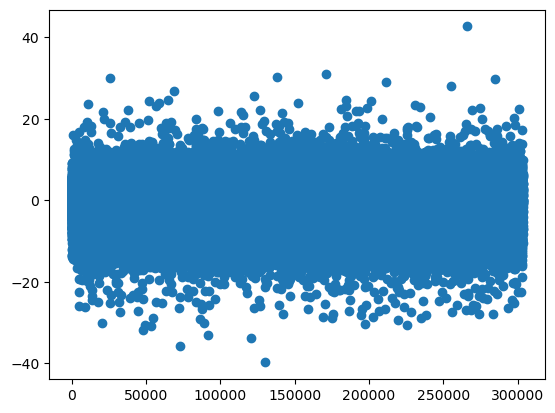

In [35]:
model_results = eval_models()

In [36]:
model_results

,r_score,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.389383,5.103325,5.083825,3.980477,3.967731,{}
RandomForestRegressor,0.666575,3.754771,3.756689,2.698978,2.699416,"{'max_depth': 9, 'n_estimators': 45}"
XGBRegressor,0.677914,3.671015,3.692257,2.628157,2.638668,"{'learning_rate': 0.1, 'n_estimators': 710}"


# Problem 3 :
**How can we determine or predict the value of DV_pressure with the help of different readings of digital sensors ?**

From above heatmap, we can infer that DV_pressure is majorly influenced by TP2 and H1 as correlation between DV_pressure and TP2 and H1 is more than 0.4 or less than -0.4.

Interpretation of the relationship between DV_pressure and TP2 and H1 :
1. DV_pressure and TP2 (Pressure on compressor):
    The positive correlation between DV_Pressure and TP2 indicates that when the compressor operates at higher pressure levels (TP2), it can lead to greater pressure drop due to the discharge of water in the air dryers towers, resulting in increased DV_Pressure.
2. DV_pressure and H1 (Valve activated above 10.2 bar):
    The negative correlation between DV_Pressure and H1 suggests that when the valve H1 is activated due to high pressure (above 10.2 bar), it tends to reduce the pressure drop caused by the air dryers towers, resulting in lower DV_Pressure.

In [37]:
# The below python code for splitting the data , training the data and the code for hyperparameter tuning using grid search are referred from Lab2 House Rent Prediction.

data_df = df[["TP2","H1"]]
X_train, X_test, y_train, y_test = train_test_split(data_df, df["DV_pressure"], random_state=42, test_size=0.20)

size_scaler = RobustScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 2), (303390, 2))

LinearRegression 0.3453613659404015 {}
RandomForestRegressor 0.15786822208770424 {'max_depth': 9, 'n_estimators': 35}
XGBRegressor 0.17580943685527103 {'learning_rate': 0.1, 'n_estimators': 210}
Best model:  RandomForestRegressor(max_depth=9, n_estimators=35, random_state=42)


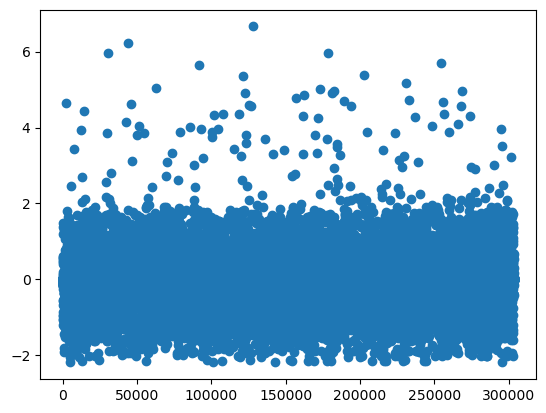

In [38]:
model_results = eval_models()

In [39]:
model_results

,r_score,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.18194,0.345361,0.348322,0.124809,0.125548,{}
RandomForestRegressor,0.828056,0.157868,0.159692,0.032444,0.032936,"{'max_depth': 9, 'n_estimators': 35}"
XGBRegressor,0.788878,0.175809,0.176952,0.03503,0.035269,"{'learning_rate': 0.1, 'n_estimators': 210}"


# Problem 4 :
**How can we determine or predict the value of Motor current with the help of different readings of digital sensors ?**

From above heatmap, we can infer that motor current is majorly influenced by TP2, TP3, H1, Reservoirs and Oil_temperature as correlation between DV_pressure and TP2 and H1 is more than 0.4 or less than -0.4.

Interpretation of the relationship between Motor_current and TP2, TP3, H1, Reservoirs and Oil_temperature :
1. Motor_current and TP2 (Pressure on compressor):
    TThe positive correlation between Motor current and TP2 indicates that when the compressor's motor works harder and draws more current, it typically results in higher pressure output from the compressor.
2. Motor_current and TP3 (Pressure generated at pneumatic panel):
    The positive correlation between Motor current and TP3 implies that as the motor's current increases, the pressure generated at the pneumatic panel (TP3) tends to increase as well.
3. Motor_current and Reservoirs (Pressure inside air tanks):
    The positive correlation between Motor current and Reservoirs indicates that higher motor current is linked to increased pressure in the air tanks, likely due to the compressor working harder.
4. Motor_current and Oil_temperature (Temperature of oil on compressor):
    The positive correlation between Motor current and Oil_temperature suggests that the compressor's workload, indicated by higher motor current, can result in increased thermal stress on the oil temperature.
5. Motor_current and H1 (Valve activated when pressure is above 10.2 bar):
    The negative correlation between Motor current and H1 indicates that when the compressor is working harder, it may be less likely to reach the pressure threshold that triggers H1 activation.

In [40]:
# The below python code for splitting the data , training the data and the code for hyperparameter tuning using grid search are referred from Lab2 House Rent Prediction.

data_df = df[["TP2","TP3","H1","Reservoirs","Oil_temperature"]]
X_train, X_test, y_train, y_test = train_test_split(data_df, df["Motor_current"], random_state=42, test_size=0.20)

size_scaler = RobustScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 5), (303390, 5))

LinearRegression 1.2065369413149927 {}
RandomForestRegressor 0.6971405864419021 {'max_depth': 9, 'n_estimators': 45}
XGBRegressor 0.6824911088673573 {'learning_rate': 0.1, 'n_estimators': 710}
Best model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=710, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


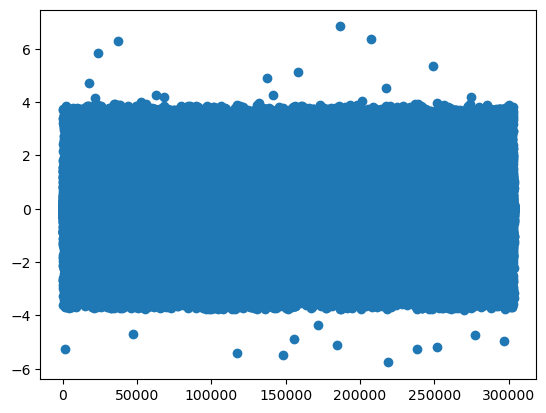

In [41]:
model_results = eval_models()

In [42]:
model_results

,r_score,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.727179,1.206537,1.20232,0.980341,0.978341,{}
RandomForestRegressor,0.906464,0.697141,0.703995,0.281091,0.284648,"{'max_depth': 9, 'n_estimators': 45}"
XGBRegressor,0.907543,0.682491,0.699925,0.273731,0.281378,"{'learning_rate': 0.1, 'n_estimators': 710}"
